Executive findings
    - Reoslution rates are declining


Data Exploration

 - Looking below, this is data on tickets opened for the city. It seems to be a service where residents can call into the city and have certain issues fixed regarding public infrastructure and services. 

Key KPIs
 
 - Most call centers success metrics revolve around ticket resolution rate. Let's see if we can provide a recommendation here regarding ticket resolution rate.

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
call_current.read_csv('D:\Interview Coding\interviews\interviews\gladly_interview\callcenterdatacurrent.csv')
call_current.head()
call_current 

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2026-01-11 00:00:00,2745 S 45TH ST,Street Light Cycling,2026-01-12 00:00:00,Cycles on and off in seemingly regular intervals
1,2026-01-11 00:00:00,"3473 S ALABAMA AV, MILWAUKEE, WI, 53207-3640",Christmas Tree Pickup,2026-01-12 00:00:00,NaN
2,2026-01-11 00:00:00,"2730 W JUNEAU AV, MILWAUKEE, WI, 53208-2918",Bulky Pickup & San Inspector Notification,NaN,My neighbor has left this waste on 28th betwee...
3,2026-01-11 00:00:00,"2915 N DOWNER AV, MILWAUKEE, WI, 53211-3335",Missed Collection: Recycling,2026-01-12 00:00:00,"Both cans were full last weeks pick up, only o..."
4,2026-01-11 00:00:00,"3938 N 13TH ST, MILWAUKEE, WI, 53206-3016",Backwater,2026-01-12 00:00:00,Leaves were still piled in street during snow ...
...,...,...,...,...,...
325,2026-01-01 00:00:00,"6810 W Dakota St, Milwaukee, WI 53219, USA",Icy Road,2026-01-02 00:00:00,Resident reporting icy roads requesting salt
326,2026-01-01 00:00:00,"1613 E EDEN PL, MILWAUKEE, WI, 53207-3642",Missed Collection: Recycling,NaN,"Carts were our on pick up day 12/26, never pic..."
327,2026-01-01 00:00:00,"5244 N 84TH ST, MILWAUKEE, WI, 53225-3502",Garbage Cart: Damaged,NaN,One garbage cart has a cover that is no longer...
328,2026-01-01 00:00:00,"9411 W ADLER ST, MILWAUKEE, WI, 53214-1271",Recycling Supervisor Notification,NaN,This is the third time in a row\nnow for misse...


In [38]:
# Do the same but for historical as well
call_history_historical = pd.read_csv('D:\Interview Coding\interviews\interviews\gladly_interview\callcenterdatahistorical.csv')
call_history_historical.head()
call_history_historical

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2025-12-31 00:00:00,"5620 W PHILIP PL, MILWAUKEE, WI, 53216-3147",Missed Collection: Garbage,NaN,I haven’t had garbage pickup since December 12...
1,2025-12-31 00:00:00,3240 S ILLINOIS AV,Garbage Cart Collection Request: Cart Not at C...,NaN,My garbage was missed yesterday. You also have...
2,2025-12-31 00:00:00,3203 S ILLINOIS AV,Missed Collection: Garbage,NaN,You Missed my garbage cart yesterday. Also hav...
3,2025-12-31 00:00:00,3240 S ILLINOIS AV,Leaf Pickup Request,NaN,Missed leafs my neighbor put out months ago
4,2025-12-31 00:00:00,"6565 N 73rd St, Milwaukee, WI 53223, USA",Missed Collection: Garbage,2025-12-31 00:00:00,Garbage collection missed for the entire block.
...,...,...,...,...,...
175835,2020-04-27 00:00:00,"3925 W FOREST HOME AV, MILWAUKEE, WI, 532153536",Drainage or Standing Water Not Related to a Cl...,NaN,Alley has sunken allowing it to collect and ho...
175836,2020-04-27 00:00:00,"1628 N 36TH ST, MILWAUKEE, WI, 532082346",Garbage Cart: No Cart,NaN,Address has no garbage or recycling carts. We...
175837,2020-04-26 00:00:00,"915 R E WISCONSIN AV, MILWAUKEE, WI, 532020000",Other Miscellaneous Electrical Services Request,2020-04-27 00:00:00,The big clock on the Miller Brewing Pavilion h...
175838,2020-04-25 00:00:00,"3060 N GORDON CR, MILWAUKEE, WI, 532122224",Recycling Supervisor Notification,NaN,Missed collections


In [59]:
#In the historical data filter for those with no case closereasondescription. use method chaining
call_history_historical = call_history_historical[call_history_historical['CASECLOSUREREASONDESCRIPTION'].isnull()]
call_history_historical

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
8,2025-12-31 00:00:00,"3218 S BURRELL ST, MILWAUKEE, WI, 53207-2753",Christmas Tree Pickup,NaN,NaN
17,2025-12-30 00:00:00,"2207 N 41ST ST, MILWAUKEE, WI, 53208-1304",Collection Schedule - Garbage and Recycling,NaN,NaN
18,2025-12-30 00:00:00,"2207 N 41ST ST, MILWAUKEE, WI, 53208-1304",INFO ONLY: Garbage Collection Day Information ...,2025-12-30 00:00:00,NaN
26,2025-12-30 00:00:00,"1527 N JEFFERSON ST, MILWAUKEE, WI, 53202-2071",Sidewalks Not Shoveled (adjacent to Private Pr...,NaN,NaN
39,2025-12-30 00:00:00,"141 W ALLERTON AV, MILWAUKEE, WI, 53207-4909",Area Dark,2025-12-31 00:00:00,NaN
...,...,...,...,...,...
175809,2020-05-04 00:00:00,"2321 S 11TH ST, MILWAUKEE, WI, 532153104",Recycling Cart: No Cart,NaN,NaN
175813,2020-05-03 00:00:00,"2423 S ST CLAIR ST, MILWAUKEE, WI, 532071927",Roots Lifting Sidewalk,NaN,NaN
175814,2020-05-03 00:00:00,"1210 E POTTER AV 1, MILWAUKEE, WI, 532071984",Pothole,NaN,NaN
175815,2020-05-03 00:00:00,"2451 S DELAWARE AV, MILWAUKEE, WI, 532070000",Roots Lifting Sidewalk,NaN,NaN


Basic stats looking at creation date and by week. Look at creation data but also the percent that are closed within 30 days. All so 

(array([18993., 19174., 19358., 19539., 19723., 19905., 20089., 20270.,
        20454.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01'),
  Text(20270.0, 0, '2025-07'),
  Text(20454.0, 0, '2026-01')])

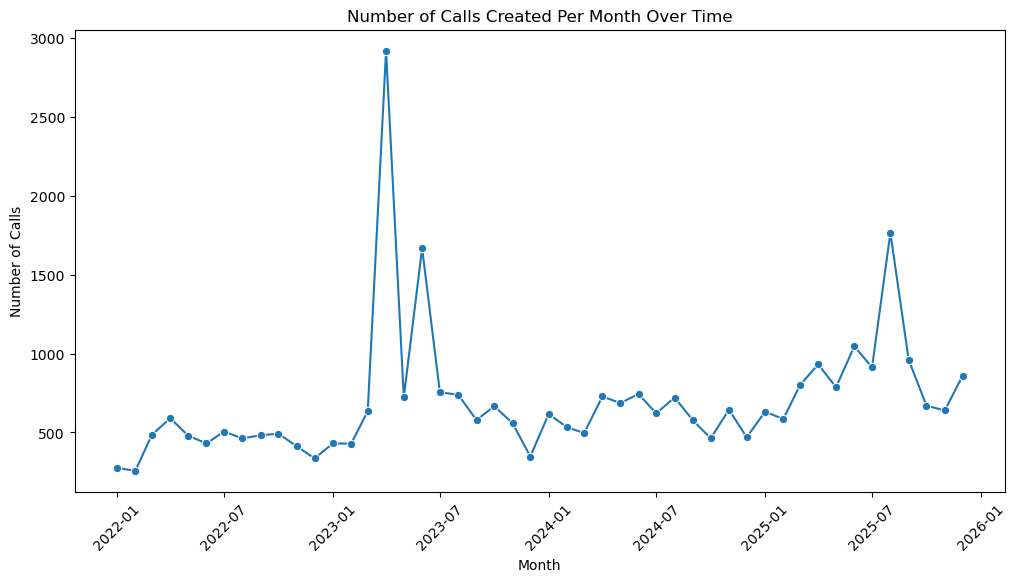

In [36]:
## Group by creation month count how many were created by month. I want to be able to overlay year over each other. Use method chaining. Filter out 2021 going forwards. 

call_history_grouped = (call_history_historical
    .assign(creation_month=lambda df: pd.to_datetime(df['CREATIONDATE']).dt.to_period('M').dt.start_time)
    .query("creation_month >= '2022-01-01'")
    .groupby(['creation_month'])
    .size()
    .reset_index(name='call_count')
    .sort_values('creation_month')
)
call_history_grouped.head()

## Plot the number of calls created per month over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=call_history_grouped, x='creation_month', y='call_count', marker='o')
plt.title('Number of Calls Created Per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

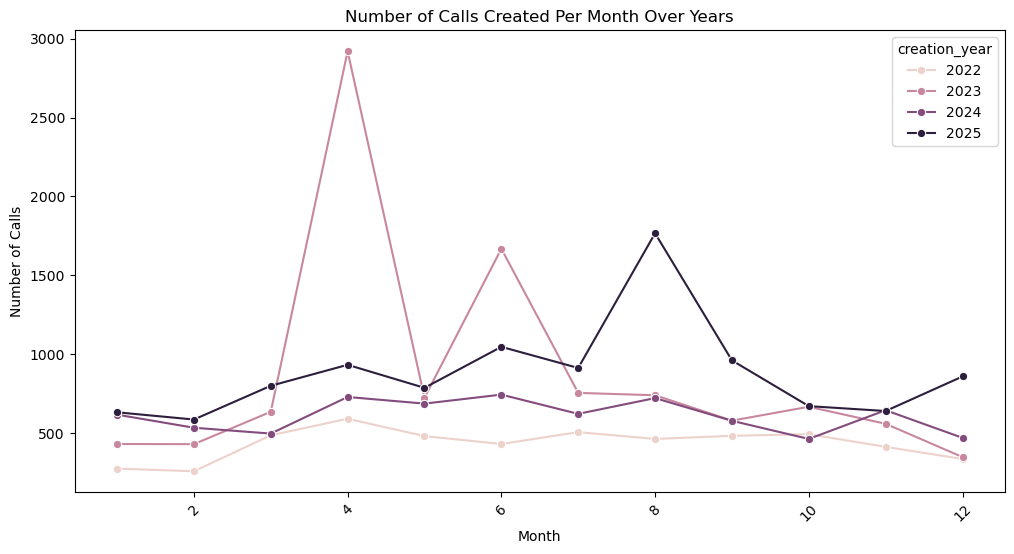

In [37]:
# Same as above but group by year and month to overlay years
call_history_grouped_yearly = (call_history_historical
    .assign(creation_month=lambda df: pd.to_datetime(df['CREATIONDATE']).dt.to_period('M').dt.start_time,
            creation_year=lambda df: pd.to_datetime(df['CREATIONDATE']).dt.year,
            creation_month_only=lambda df: pd.to_datetime(df['CREATIONDATE']).dt.month)
    .query("creation_year >= 2022")
    .groupby(['creation_year', 'creation_month_only'])
    .size()
    .reset_index(name='call_count')
    .sort_values(['creation_year', 'creation_month_only'])
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=call_history_grouped_yearly, x='creation_month_only', y
='call_count', hue='creation_year', marker='o')
plt.title('Number of Calls Created Per Month Over Years')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

After excluding 2021 (which had strange data) We see above that overall, we see that 2025 seems to have months with more call center volume. Population change could be a factor but the population for Milwaukee has fluctuated around 562K in the past five years with not many significant YoY changes in population. There are also some volume spikes for certain months that might be correlated with a certain event. This increased call volume in general might strain the cities ticket response times. Let's take a look at how that changes over time. 

First let's define response time as resolving a ticket within 15 days. Anything over that will count as not being responded to properly

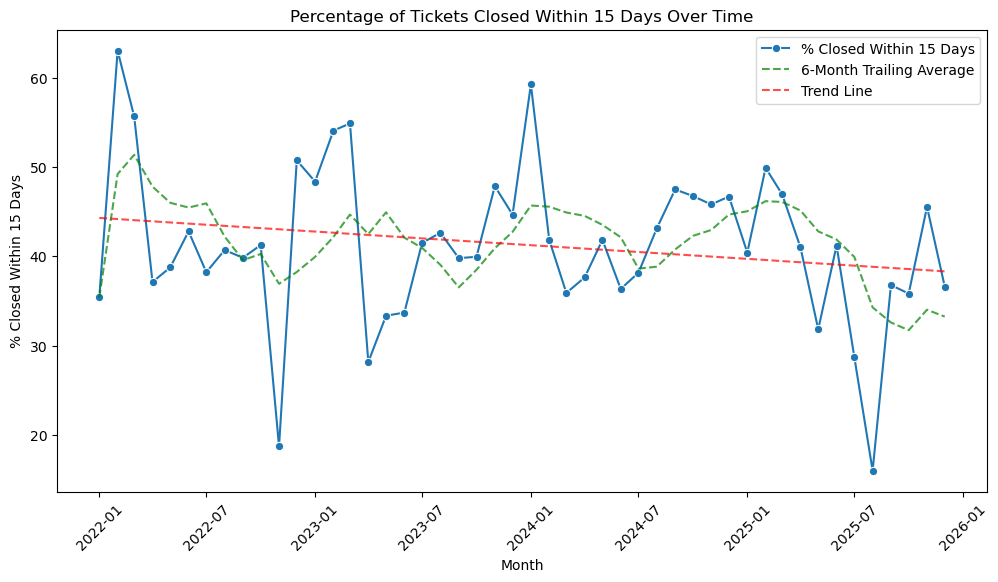

In [55]:
# Use call_history_historical and calculate the pct of tickets that were closed within 30 days of creation date. Use method chaining. Add line of best fit to % of tickets closed within 15 days over time. Add a line that is the trailing 6 month average

# Calculate the percentage of tickets closed within 30 days over time
# Group by month to show trends over time
# Calculate the percentage of tickets closed within 15 days over time
# Group by month to show trends over time
pct_closed_within_30_days = (call_history_historical
    .assign(CREATIONDATE=lambda df: pd.to_datetime(df['CREATIONDATE']),
            CLOSEDATE=lambda df: pd.to_datetime(df['CLOSEDDATETIME']))
    .assign(creation_month=lambda df: df['CREATIONDATE'].dt.to_period('M').dt.start_time,
            creation_year=lambda df: df['CREATIONDATE'].dt.year)
    .query("creation_year >= 2022")
    .assign(DAYS_TO_CLOSE=lambda df: (df['CLOSEDATE'] - df['CREATIONDATE']).dt.days)
    .assign(CLOSED_WITHIN_15_DAYS=lambda df: np.where(df['DAYS_TO_CLOSE'] <= 15, 1, 0))
    .groupby('creation_month')
    .agg(pct_closed_15_days=('CLOSED_WITHIN_15_DAYS', lambda x: x.mean() * 100))
    .reset_index()
    .assign(trailing_6mo_avg=lambda df: df['pct_closed_15_days'].rolling(window=6, min_periods=1).mean())
)

# Plot the percentage of tickets closed within 15 days over time with line of best fit and trailing 6 month average
plt.figure(figsize=(12, 6))
sns.lineplot(data=pct_closed_within_30_days, x='creation_month', y='pct_closed_15_days', marker='o', label='% Closed Within 15 Days')

# Add trailing 6 month average line
sns.lineplot(data=pct_closed_within_30_days, x='creation_month', y='trailing_6mo_avg', 
             linestyle='--', color='green', alpha=0.7, label='6-Month Trailing Average')

# Add line of best fit
x_numeric = np.arange(len(pct_closed_within_30_days))
z = np.polyfit(x_numeric, pct_closed_within_30_days['pct_closed_15_days'], 1)
p = np.poly1d(z)
plt.plot(pct_closed_within_30_days['creation_month'], p(x_numeric), 
         linestyle='--', color='red', alpha=0.7, label='Trend Line')

plt.title('Percentage of Tickets Closed Within 15 Days Over Time')  
plt.xlabel('Month')
plt.ylabel('% Closed Within 15 Days')
plt.xticks(rotation=45)
plt.legend()
plt.show()




Looking at the chart above, we do see a decline in the % closed within 15 days especially within when looking at 2025 more closely. It could be possible that the increased volume is overwhelming call centers and resources. 

In the immediate term, at least for 2025, it may be prudent to invest in more call center staffing if that is the main bottleneck. In order to confirm this, I would need to look at call center capacity data to understand whether that is the main bottle neck here. 

It is also possible that the bottleneck for improving ticket resolution could be downstream from the call center (ie. park services, election_services, etc.). Let's look and see if we can bucket some of these tickets into different ticket types. 

In [60]:
call_history_historical

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
8,2025-12-31 00:00:00,"3218 S BURRELL ST, MILWAUKEE, WI, 53207-2753",Christmas Tree Pickup,NaN,NaN
17,2025-12-30 00:00:00,"2207 N 41ST ST, MILWAUKEE, WI, 53208-1304",Collection Schedule - Garbage and Recycling,NaN,NaN
18,2025-12-30 00:00:00,"2207 N 41ST ST, MILWAUKEE, WI, 53208-1304",INFO ONLY: Garbage Collection Day Information ...,2025-12-30 00:00:00,NaN
26,2025-12-30 00:00:00,"1527 N JEFFERSON ST, MILWAUKEE, WI, 53202-2071",Sidewalks Not Shoveled (adjacent to Private Pr...,NaN,NaN
39,2025-12-30 00:00:00,"141 W ALLERTON AV, MILWAUKEE, WI, 53207-4909",Area Dark,2025-12-31 00:00:00,NaN
...,...,...,...,...,...
175809,2020-05-04 00:00:00,"2321 S 11TH ST, MILWAUKEE, WI, 532153104",Recycling Cart: No Cart,NaN,NaN
175813,2020-05-03 00:00:00,"2423 S ST CLAIR ST, MILWAUKEE, WI, 532071927",Roots Lifting Sidewalk,NaN,NaN
175814,2020-05-03 00:00:00,"1210 E POTTER AV 1, MILWAUKEE, WI, 532071984",Pothole,NaN,NaN
175815,2020-05-03 00:00:00,"2451 S DELAWARE AV, MILWAUKEE, WI, 532070000",Roots Lifting Sidewalk,NaN,NaN


In [62]:
#Using method chaining. Group by title and count how many occurences there are for each title inthe historical data.
title_agg = call_history_historical.groupby('TITLE').size().reset_index(name='count').sort_values(by='count', ascending=False)
title_agg.head()

,TITLE,count
176,Parking Violations Information,4524
80,Drop-Off Centers (Self-Help) Information,3351
102,Garbage Collection Day Information Request,3048
30,"Brush Pickup Request, Less than 2 Cubic Yards,...",2930
83,Election Commission X3491 Internal Transfer,2538
...,...,...
189,Recycling Cart: Damaged,1
72,Dead Animal,1
216,Spills,1
74,"Defective Wiring, Outlets or Fixtures",1


Seems like a mix of free text responses and categories. Let's bucekt these into specific departmental categories.

In [87]:
# Define department mapping based on keywords found in ticket titles
# Each department has a list of keywords to match against TITLE column (case-insensitive contains)
department_mapping = {
    'Parking': ['Parking Violations', 'Parking Permit', 'Parking Meter', 'Parking Enforcement', 'Tow', 'Vehicle'],
    'Sanitation': ['Garbage', 'Trash', 'Recycling', 'Drop-Off', 'Brush Pickup', 'Bulk Collection', 
                   'Refuse', 'Litter', 'Illegal Dumping', 'Cart', 'Debris', 'Leaf', 'Brush Disposal',
                   'Electronics or Appliance Disposal', 'Weekend Dumpster', 'Clean and Green'],
    'Elections': ['Election', 'Election Commission', 'Voting', 'Ballot', 'Poll'],
    'Streets': ['Street', 'Pothole', 'Road', 'Sidewalk', 'Curb', 'Traffic', 'Sign', 'Signal', 
                'Crosswalk', 'Alley', 'Pavement', 'Snow', 'Plow', 'Salt'],
    'Water_Sewer': ['Water', 'Sewer', 'Drain', 'Flooding', 'Hydrant', 'Storm'],
    'Parks_Forestry': ['Park', 'Tree', 'Forestry', 'Playground', 'Weeds', 'Grass', 'Landscape'],
    'Animal_Control': ['Animal', 'Dog', 'Cat', 'Wildlife', 'Rodent', 'Pest', 'Dead Animal'],
    'Building_Housing': ['Building', 'Housing', 'Wiring', 'Plumbing', 'Heating', 'Property', 
                         'Vacant', 'Zoning', 'Permit', 'Construction', 'Fixture', 'DNS X2268', 
                         'DNS - No Contact'],
    'Health_Safety': ['Health', 'Spill', 'Hazard', 'Noise', 'Graffiti', 'Nuisance'],
    'Utilities': ['Light', 'Streetlight', 'Power', 'Electric'],
    'Licensing': ['License Division', 'Violations Bureau'],
    'Finance': ['Treasurer', 'Tax Assessor', 'Billing'],
    'City_Admin': ['Alder Office', 'City Clerk', 'City Hall Operator', 'Mayor\'s Office', 
                   'Employee Relations', 'Municipal Court'],
    'External_Transfer': ['State of Wisconsin', 'External Transfer']
}

def assign_department(title):
    """Map a ticket title to its corresponding city department based on case-insensitive keyword matching."""
    if pd.isna(title):
        return 'Other'
    title_upper = str(title).upper()
    for dept, keywords in department_mapping.items():
        for keyword in keywords:
            if keyword.upper() in title_upper:
                return dept
    return 'Other'

# Create new dataframe with department column using method chaining
call_history_with_dept = (call_history_historical
    .assign(department=lambda df: df['TITLE'].apply(assign_department))
)

# Display sample of the new dataframe with department assignments and count occurrences
# Display department distribution and sample assignments
dept_counts = call_history_with_dept['department'].value_counts().reset_index()
dept_counts.columns = ['department', 'count']
print("\nDepartment Distribution:")
print(dept_counts)
print("\nSample Department Assignments:")
print(call_history_with_dept[['TITLE', 'department']].drop_duplicates().head(20))




Department Distribution:
           department  count
0          Sanitation  22681
1               Other   6095
2             Parking   5977
3           Elections   4681
4    Building_Housing   4362
5             Streets   2163
6         Water_Sewer   1409
7           Licensing   1300
8      Parks_Forestry   1277
9          City_Admin   1021
10            Finance    739
11  External_Transfer    499
12      Health_Safety    479
13     Animal_Control    186
14          Utilities    130

Sample Department Assignments:
                                                 TITLE      department
8                                Christmas Tree Pickup  Parks_Forestry
17         Collection Schedule - Garbage and Recycling      Sanitation
18   INFO ONLY: Garbage Collection Day Information ...      Sanitation
26   Sidewalks Not Shoveled (adjacent to Private Pr...         Streets
39                                           Area Dark           Other
50                          Missed Collection: Garba

In [88]:
## Find the top keywords in the titles for the 'Other' department to see if we can improve our mapping. Add counts as well
other_titles = call_history_with_dept[call_history_with_dept['department'] == 'Other']['TITLE']
# Extract and count words from 'Other' department titles
word_counter = Counter()
for title in other_titles:      
    words = re.findall(r'\b\w+\b', str(title).upper())
    word_counter.update(words)

# Display top 40 most common words with their counts
print("Top 40 keywords in 'Other' department titles:")
for word, count in word_counter.most_common(40):
    print(f"{word}: {count}")


Top 40 keywords in 'Other' department titles:
DROPPED: 2457
CALL: 2457
INTERNAL: 1127
TRANSFER: 1127
MISCELLANEOUS: 983
AREA: 910
DARK: 910
AND: 586
QUESTIONS: 577
MOVEOUT: 565
CLEANOUT: 565
REGISTRATION: 345
DOWN: 331
BROKEN: 327
BRANCH: 327
BLOCKING: 327
NOT: 317
NO: 291
MOW: 291
MAY: 291
INFORMATION: 159
REQUEST: 158
SPECIAL: 93
DNS: 82
HANDLED: 82
BY: 82
UCC: 82
STAFF: 82
POLICE: 80
PROGRAM: 65
HARDSHIP: 54
TIRE: 49
DISPOSAL: 49
OR: 45
SERVICES: 45
MISSED: 44
COLLECTION: 44
WEBHELP: 41
ADDITIONAL: 37
ITEMS: 37


In [94]:
# Find all tickets with 'transfer' or 'internal' in the title (case-insensitive) that are classified as 'Other' department
# Group by title and count occurrences, showing a sample case closure reason to understand what these ticket types represent
transfer_internal_tickets = (call_history_with_dept
    # Filter for 'Other' department only
    .query("department == 'Other'")
    # Create uppercase version of title for case-insensitive filtering
    .assign(title_upper=lambda df: df['TITLE'].str.upper())
    # Filter for titles containing 'TRANSFER' or 'INTERNAL'
    .query("title_upper.str.contains('CALL', case=False, na=False)")
    # Group by original title and aggregate
    .groupby('TITLE')
    .agg(
        count=('TITLE', 'size'),
        sample_closure_reason=('CASECLOSUREREASONDESCRIPTION', 'first')
    )
    .reset_index()
    # Sort by count in descending order
    .sort_values('count', ascending=False)
)

# Display summary statistics
print("Tickets with 'Transfer' or 'Internal' in title (Other department only):")
print(f"\nTotal transfer/internal tickets: {transfer_internal_tickets['count'].sum()}")
print(f"Percentage of all tickets: {(transfer_internal_tickets['count'].sum() / len(call_history_with_dept)) * 100:.2f}%")
print("\nTop 20 transfer/internal ticket types:")
print(transfer_internal_tickets.head(20))

Tickets with 'Transfer' or 'Internal' in title (Other department only):

Total transfer/internal tickets: 2457
Percentage of all tickets: 4.64%

Top 20 transfer/internal ticket types:
                     TITLE  count sample_closure_reason
0             Dropped Call   2454                  None
1  INFO ONLY: Dropped Call      3                  None


I'm using the above to update the mapping earlier for the other bucket.

Ok now that we have the bucketed categories let's look and see how they are changing as a percent of tickets over time

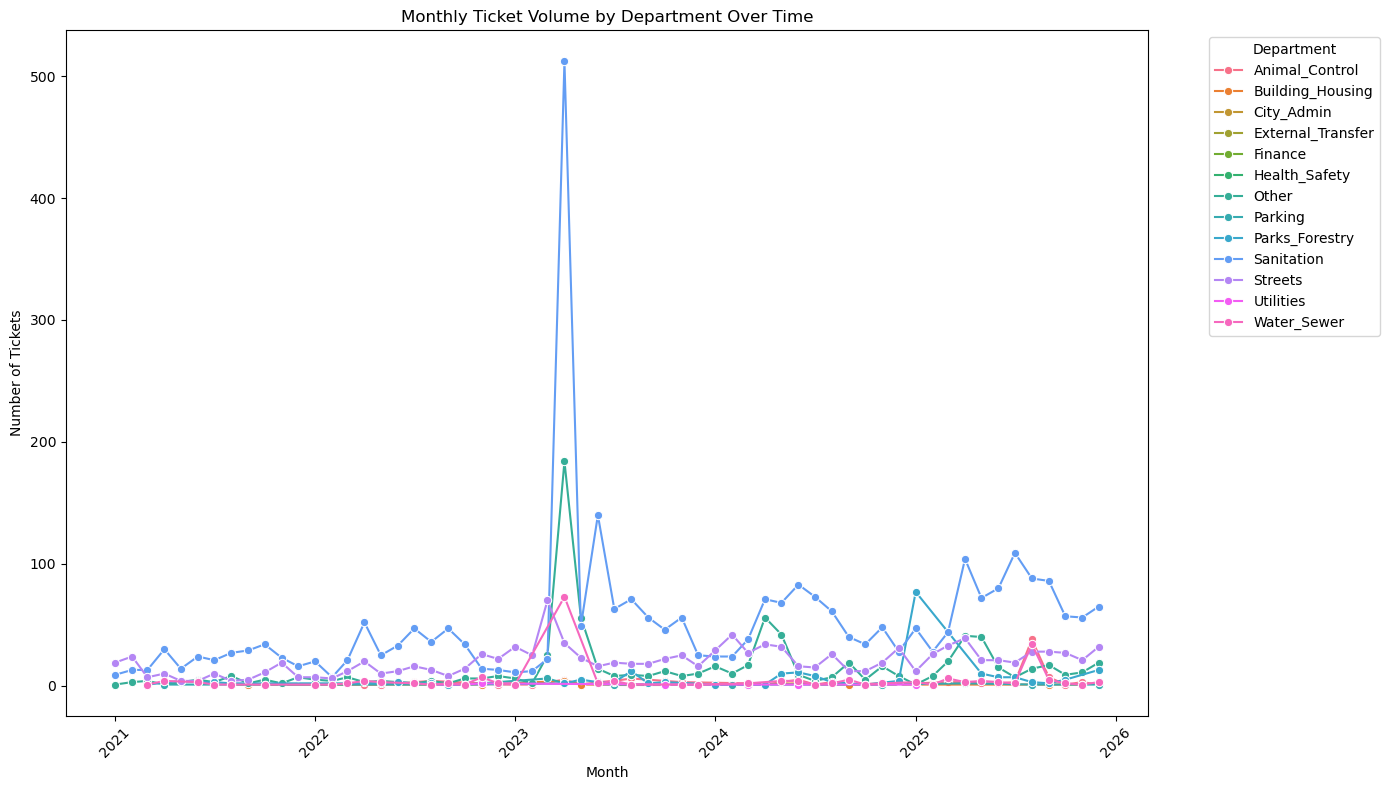

In [96]:
# Use call_history_with_dept and calculate the volume of tickets created per department per month over time. Use method chaining. Filter for 2021 and onwards
call_history_with_dept_monthly = (call_history_with_dept
    .assign(creation_month=lambda df: pd.to_datetime(df['CREATIONDATE']).dt.to_period('M').dt.start_time)
    .query("creation_month >= '2021-01-01'")
    .groupby(['department', 'creation_month'])
    .size()
    .reset_index(name='ticket_count')
    .sort_values(['department', 'creation_month'])
)

# graph call_history_with_dept_monthly
plt.figure(figsize=(14, 8))
sns.lineplot(data=call_history_with_dept_monthly, x='creation_month', y='ticket_count', hue='department', marker='o')
plt.title('Monthly Ticket Volume by Department Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Overall, we can see above that the spikes in tickets for April 2023 was mainly due to an increase in tickets due to sanitation. We also see that sanitation tickets have become a increasing share in the % of tickets worked on as 2025 went on. 



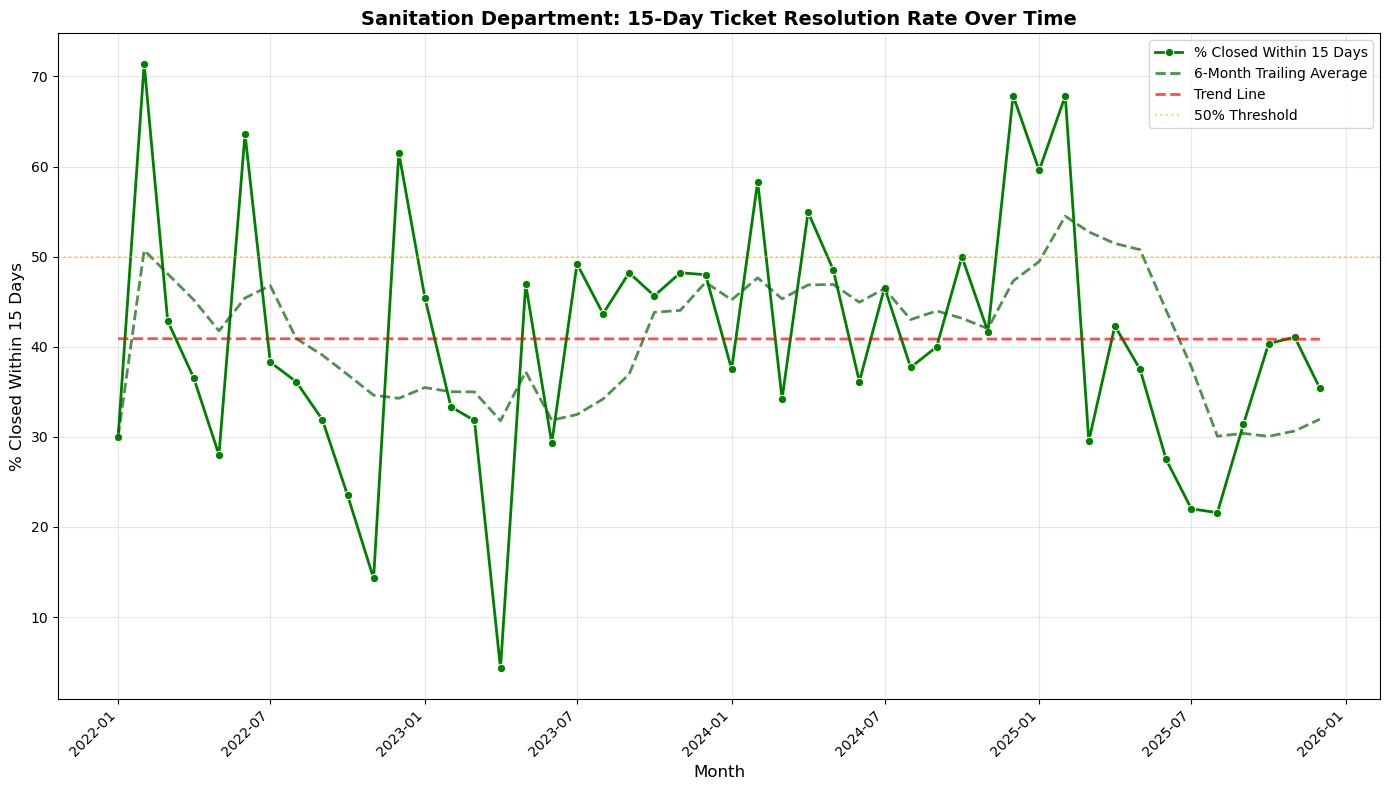

In [101]:
# Calculate 15-day ticket resolution rate for Sanitation department over time using method chaining
# Shows how well the Sanitation department is meeting the 15-day resolution target
sanitation_resolution_rate = (call_history_with_dept
    # Filter for Sanitation department only
    .query("department == 'Sanitation'")
    # Convert date columns to datetime
    .assign(CREATIONDATE=lambda df: pd.to_datetime(df['CREATIONDATE']),
            CLOSEDATE=lambda df: pd.to_datetime(df['CLOSEDDATETIME']))
    # Extract creation month and year
    .assign(creation_month=lambda df: df['CREATIONDATE'].dt.to_period('M').dt.start_time,
            creation_year=lambda df: df['CREATIONDATE'].dt.year)
    # Filter for 2022 onwards to match previous analysis
    .query("creation_year >= 2022")
    # Calculate days to close
    .assign(DAYS_TO_CLOSE=lambda df: (df['CLOSEDATE'] - df['CREATIONDATE']).dt.days)
    # Flag tickets closed within 15 days
    .assign(CLOSED_WITHIN_15_DAYS=lambda df: np.where(df['DAYS_TO_CLOSE'] <= 15, 1, 0))
    # Group by month to show trends
    .groupby('creation_month')
    .agg(
        total_tickets=('CLOSED_WITHIN_15_DAYS', 'count'),
        pct_closed_15_days=('CLOSED_WITHIN_15_DAYS', lambda x: x.mean() * 100)
    )
    .reset_index()
    # Add trailing 6 month average for trend smoothing
    .assign(trailing_6mo_avg=lambda df: df['pct_closed_15_days'].rolling(window=6, min_periods=1).mean())
    .sort_values('creation_month')
)

# Create visualization showing Sanitation department's 15-day resolution rate over time
plt.figure(figsize=(14, 8))

# Plot monthly resolution rate
sns.lineplot(data=sanitation_resolution_rate, x='creation_month', y='pct_closed_15_days', 
             marker='o', linewidth=2, label='% Closed Within 15 Days', color='green')

# Add trailing 6 month average line
sns.lineplot(data=sanitation_resolution_rate, x='creation_month', y='trailing_6mo_avg', 
             linestyle='--', linewidth=2, alpha=0.7, label='6-Month Trailing Average', color='darkgreen')

# Add line of best fit to show overall trend
x_numeric = np.arange(len(sanitation_resolution_rate))
z = np.polyfit(x_numeric, sanitation_resolution_rate['pct_closed_15_days'], 1)
p = np.poly1d(z)
plt.plot(sanitation_resolution_rate['creation_month'], p(x_numeric), 
         linestyle='--', color='red', alpha=0.7, linewidth=2, label='Trend Line')

# Add horizontal reference line at 50%
plt.axhline(y=50, color='orange', linestyle=':', alpha=0.5, label='50% Threshold')

plt.title('Sanitation Department: 15-Day Ticket Resolution Rate Over Time', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('% Closed Within 15 Days', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


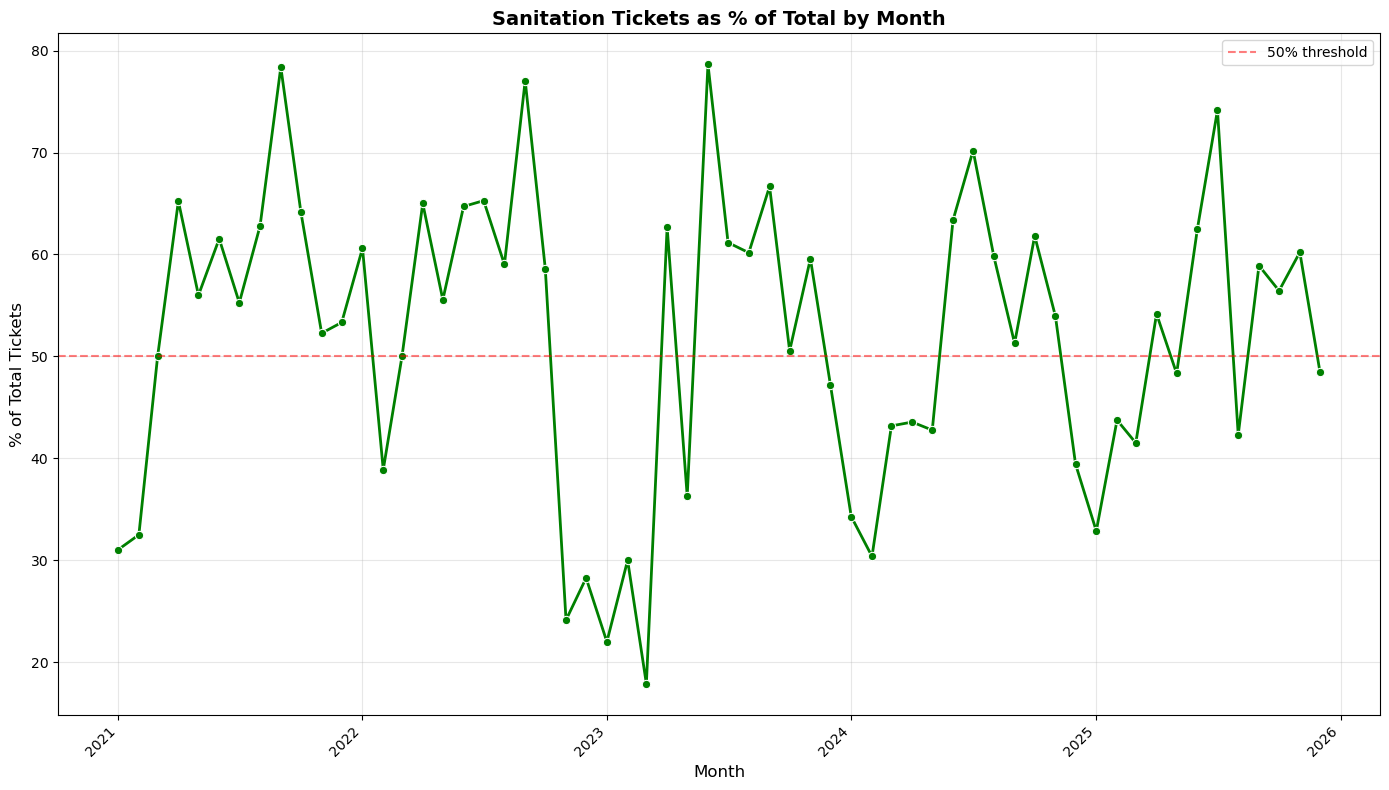

In [98]:
# Use call_history_with_dept and calculate the volume of tickets created per department per month over time. Use method chaining. Filter for 2021 and onwards. Do % of total and do stacked bar charts. Add data labels
# Calculate percentage of total tickets by department per month using method chaining
# This creates a normalized view showing each department's share of total monthly tickets
call_history_with_dept_pct = (call_history_with_dept
    .assign(creation_month=lambda df: pd.to_datetime(df['CREATIONDATE']).dt.to_period('M').dt.start_time)
    .query("creation_month >= '2021-01-01'")
    .groupby(['department', 'creation_month'])
    .size()
    .reset_index(name='ticket_count')
    # Calculate total tickets per month
    .assign(total_per_month=lambda df: df.groupby('creation_month')['ticket_count'].transform('sum'))
    # Calculate percentage of total
    .assign(pct_of_total=lambda df: (df['ticket_count'] / df['total_per_month']) * 100)
    .sort_values(['creation_month', 'department'])
)

# Create line chart showing only Sanitation department's percentage over time
plt.figure(figsize=(14, 8))

# Filter for Sanitation department only
sanitation_data = call_history_with_dept_pct[call_history_with_dept_pct['department'] == 'Sanitation']

# Plot Sanitation percentage over time
sns.lineplot(data=sanitation_data, x='creation_month', y='pct_of_total', marker='o', color='green', linewidth=2)

plt.title('Sanitation Tickets as % of Total by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('% of Total Tickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add horizontal line at 50% for reference
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()

plt.show()


Wow, double clicking into sanitation, it is around 50% of the volume and the resolution rate has declined significantly over the past year. Although, it's pretty constant as a percent of tickets, sanitation is really driving down the resolution rates.
 

We